### **PREDICTING SUICIDES NUMBER PROJECT   ** 

**CONTENT**


1.   definition
2.   preprocessing
3.   analysis
4.   implementation 
5.   results



# definition 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:

country= pd.read_csv('../input/who_suicide_statistics.csv')

In [4]:
country.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [5]:
country.shape

(43776, 6)

In [6]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [7]:
# drop NaNs
country.dropna(axis=0,inplace =True)


In [8]:
country.shape

(36060, 6)

In [9]:
# finding duplicates
Dub = country.duplicated()
np.unique(Dub)

array([False])

## PREPROCESSING

In [10]:
# Labeling by using LabelEncoder
from sklearn import preprocessing

le1 = preprocessing.LabelEncoder()
le2 = preprocessing.LabelEncoder()
le3 = preprocessing.LabelEncoder()
le_sex=le1.fit(country.sex)
le_age=le2.fit(country.age)
le_country=le3.fit(country.country)

country.sex = le_sex.transform(country.sex) # female:0 , male:1
country.age = le_age.transform(country.age) # 15-24: 0, 25-34:1, 35-54:2 , 5-14:3, 55-74:4, 75+:5
country.country=le_country.transform(country.country)
country.head()

,country,year,sex,age,suicides_no,population
24,0,1987,0,0,14.0,289700.0
25,0,1987,0,1,4.0,257200.0
26,0,1987,0,2,6.0,278800.0
27,0,1987,0,3,0.0,311000.0
28,0,1987,0,4,0.0,144600.0


In [11]:
country.describe()

,country,year,sex,age,suicides_no,population
count,36060.000000,36060.000000,36060.000000,36060.000000,36060.000000,3.606000e+04
mean,57.739767,1998.935441,0.500000,2.500000,221.809956,1.699996e+06
std,34.405399,10.163883,0.500007,1.707849,855.449442,3.697811e+06
min,0.000000,1979.000000,0.000000,0.000000,0.000000,2.590000e+02
25%,28.000000,1991.000000,0.000000,1.000000,2.000000,8.056600e+04
50%,56.000000,2000.000000,0.500000,2.500000,21.000000,3.757650e+05
75%,87.000000,2008.000000,1.000000,4.000000,116.000000,1.344900e+06
max,117.000000,2016.000000,1.000000,5.000000,22338.000000,4.380521e+07


# Analysis


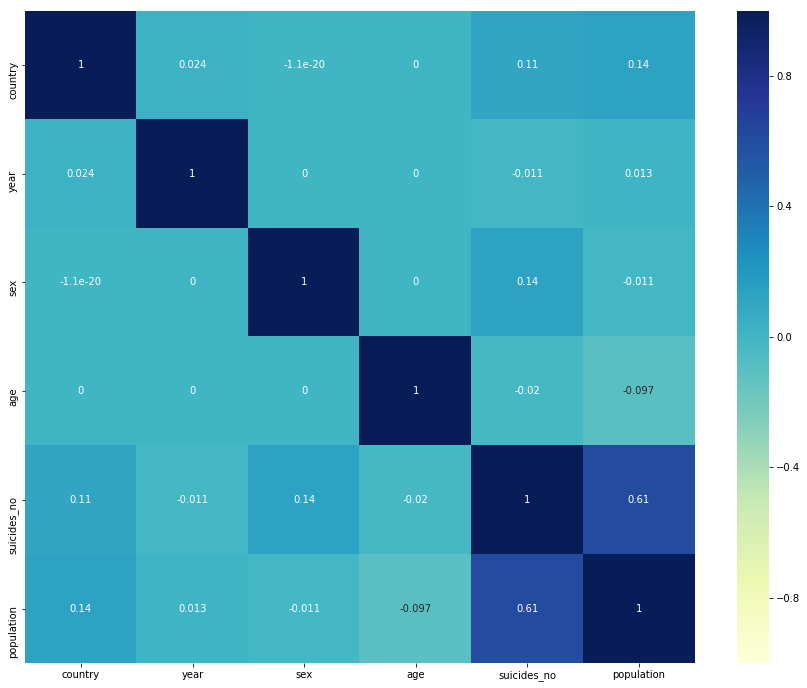

In [12]:
fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(country.corr(), annot=True, vmin=-1, vmax=1, cmap="YlGnBu")

In [13]:
#splitting the data to feature vector and target 
y=country['suicides_no']

X=country[['country','age','sex','population']]


# draw world map for each country with suicide number 

In [14]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # Map (long, lat) to (x, y) for plotting: FRANCE
    x, y = m(2.34, 48.8)
    plt.plot(x, y, 'or', markersize=France_freq*0.0001, alpha=0.5)
    
    x, y = m(9, 47.8)
    plt.text(x, y, 'France', fontsize=16);
    
    x, y = m(9, 44.8)
    plt.text(x, y, France_freq, fontsize=16);
    
    
    # Map (long, lat) to (x, y) for plotting: SPAIN
    x, y = m(-3.7, 40.4)
    plt.plot(x, y, 'ob', markersize=spain_freq*0.0001, alpha=0.5)
    
    x, y = m(-0.9, 40.4)
    plt.text(x, y, 'Spain', fontsize=16);
    
    
    x, y = m(-0.9, 37.4)
    plt.text(x, y, spain_freq, fontsize=16);
    
    
    # Map (long, lat) to (x, y) for plotting: GERMANY
    x, y = m(13.4, 53.5)
    plt.plot(x, y, 'og', markersize=germany_freq*0.0001, alpha=0.5)
    
    x, y = m(16.4, 53.5)
    plt.text(x, y, 'Germany', fontsize=16);
    
    x, y = m(17.4, 50.5)
    plt.text(x, y, germany_freq, fontsize=16);
    
    
    # Map (long, lat) to (x, y) for plotting: UAE
    x, y = m(53.8, 23.4)
    plt.plot(x, y, 'og', markersize=uae_freq*0.01, alpha=0.5)
    
    x, y = m(54.4, 24.5)
    plt.text(x, y, 'United Arab Emirates', fontsize=16);
    
    x, y = m(56.4, 26.5)
    plt.text(x, y, uae_freq, fontsize=16);
    
    
    # Map (long, lat) to (x, y) for plotting: Egypt
    x, y = m(30.7957, 26.50)
    plt.plot(x, y, 'or', markersize=uae_freq*0.01, alpha=0.5)
    
    x, y = m(30.4, 27.5)
    plt.text(x, y, 'Arab Republic of Egypt ', fontsize=16);
    
    x, y = m(30.4, 29.5)
    plt.text(x, y, uae_freq, fontsize=16);
    
    
    
    
    
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

In [15]:
# printing the encoded countries (each country is given a code)

egypt=le_country.transform(['Egypt'])
france=le_country.transform(['France'])
spain=le_country.transform(['Spain'])
germany=le_country.transform(['Germany'])
sweden=le_country.transform(['Sweden'])
uae=le_country.transform(['United Arab Emirates'])
uk=le_country.transform(['United Kingdom'])
usa=le_country.transform(['United States of America'])
items=[]
for i, item in enumerate(le3.classes_):
    items.append(item)
    print(item, '=>', i)

Albania => 0
Antigua and Barbuda => 1
Argentina => 2
Armenia => 3
Aruba => 4
Australia => 5
Austria => 6
Azerbaijan => 7
Bahamas => 8
Bahrain => 9
Barbados => 10
Belarus => 11
Belgium => 12
Belize => 13
Bermuda => 14
Bosnia and Herzegovina => 15
Brazil => 16
Brunei Darussalam => 17
Bulgaria => 18
Cabo Verde => 19
Canada => 20
Cayman Islands => 21
Chile => 22
Colombia => 23
Costa Rica => 24
Croatia => 25
Cuba => 26
Cyprus => 27
Czech Republic => 28
Denmark => 29
Dominica => 30
Ecuador => 31
Egypt => 32
El Salvador => 33
Estonia => 34
Fiji => 35
Finland => 36
France => 37
French Guiana => 38
Georgia => 39
Germany => 40
Greece => 41
Grenada => 42
Guadeloupe => 43
Guatemala => 44
Guyana => 45
Hong Kong SAR => 46
Hungary => 47
Iceland => 48
Iran (Islamic Rep of) => 49
Ireland => 50
Israel => 51
Italy => 52
Jamaica => 53
Japan => 54
Kazakhstan => 55
Kiribati => 56
Kuwait => 57
Kyrgyzstan => 58
Latvia => 59
Lithuania => 60
Luxembourg => 61
Macau => 62
Maldives => 63
Malta => 64
Martinique => 

In [18]:
# total  number of suicidess in some country in all ages from 1985 to 2015
France_freq = country[country['country'] == france[0]]['suicides_no'].sum()
spain_freq = country[country['country'] == spain[0]]['suicides_no'].sum()
germany_freq = country[country['country'] == germany[0]]['suicides_no'].sum()
egypt_freq = country[country['country'] == egypt[0]]['suicides_no'].sum()
uk_freq = country[country['country'] == uk[0]]['suicides_no'].sum()
usa_freq = country[country['country'] == usa[0]]['suicides_no'].sum()
uae_freq = country[country['country'] == uae[0]]['suicides_no'].sum()
sweden_freq = country[country['country'] == sweden[0]]['suicides_no'].sum()



In [19]:
# draw basemap containing some countries with the total number of suicides in all ages from 1985 :2015
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(24, 12))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)


KeyError: 'PROJ_LIB'

**SUICIDES BASED ON COUNTRIES :**

In [20]:
# getting the total number of suicides in each country

suicides_each_country=country.groupby(['country']).sum()
country_df = pd.DataFrame(suicides_each_country['suicides_no'])
country_df.index = (np.arange(118))
country_df.columns = ['Sum of suicides_no']

country_df

,Sum of suicides_no
0,1970.0
1,11.0
2,93862.0
3,2422.0
4,120.0
5,80279.0
6,60179.0
7,3366.0
8,107.0
9,463.0


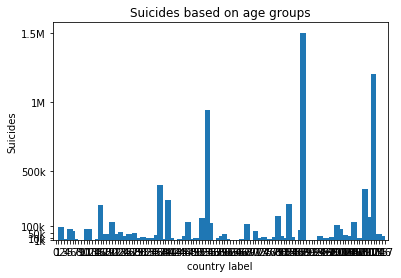

In [21]:
n = np.arange(118)
plt.bar(n, country_df['Sum of suicides_no'] , 2)

plt.ylabel('Suicides')
plt.xlabel('country label')
plt.xticks(n, country_df.index)
plt.title('Suicides based on age groups')
plt.yticks([1000,10000,50000,100000,500000,1000000,1500000],
           ['1k','10k','50k','100k','500k','1M','1.5M'])
plt.rcParams['figure.figsize']=(30,1)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

In [22]:
# from graph the hieghest country in suicides number from 1985:2015 is russia federation 
country.max()
le_country.inverse_transform([88])

array(['Russian Federation'], dtype=object)

**SUICIDES BASED ON AGE GROUPS:**

In [23]:
bins = [3, 0, 1, 2, 4, 5]
n = len(bins)
agedata = [country[country['age']==bins[i]]['suicides_no'].values.sum() for i in range(n)]

Age_df = pd.DataFrame(agedata)
Age_df.index = ('5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years')
Age_df.columns = ['Sum of suicides_no']
Age_df

,Sum of suicides_no
5-14 years,62320.0
15-24 years,975700.0
25-34 years,1360780.0
35-54 years,2887740.0
55-74 years,1955150.0
75+ years,756777.0


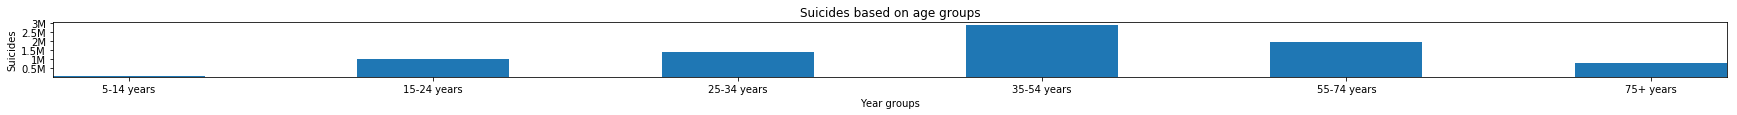

In [24]:
n = np.arange(6)
plt.bar(n, Age_df['Sum of suicides_no'] , 0.5)

plt.ylabel('Suicides')
plt.xlabel('Year groups')
plt.xticks(n, Age_df.index)
plt.title('Suicides based on age groups')
plt.yticks([500000,1000000,1500000,2000000,2500000,3000000],
           ['0.5M','1M','1.5M','2M','2.5M','3M'])
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

**SUICIDES BASED ON GENDER AND AGE:**

In [25]:
bins = [3, 0, 1, 2, 4, 5]
n = len(bins)
Female = country[country['sex']==0]
femaledata = [Female[Female['age']==bins[i]]['suicides_no'].values.sum() for i in range(n)]

Male = country[country['sex']==1]
maledata = [Male[Male['age']==bins[i]]['suicides_no'].values.sum() for i in range(n)]

In [26]:
Female_df = pd.DataFrame(femaledata)
Female_df.index = ('5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years')
Female_df.columns = ['Sum of female suicides_no']

Male_df = pd.DataFrame(maledata)
Male_df.index = Female_df.index
Male_df.columns = ['Sum of male suicides_no']

Sex_concat = pd.concat([Male_df, Female_df], axis = 1)
Sex_concat

,Sum of male suicides_no,Sum of female suicides_no
5-14 years,42168.0,20152.0
15-24 years,757391.0,218309.0
25-34 years,1104353.0,256427.0
35-54 years,2280320.0,607420.0
55-74 years,1426791.0,528359.0
75+ years,493150.0,263627.0


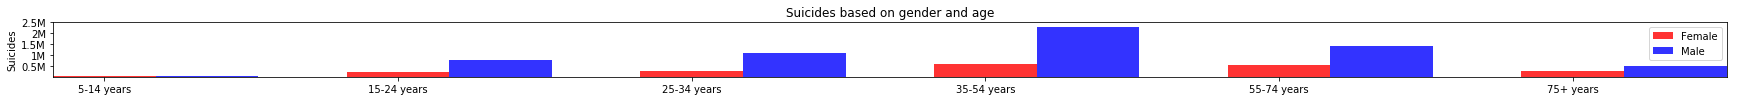

In [27]:
fig, ax = plt.subplots()
n = np.arange(6)
bar_width = 0.35
opacity = 0.8
rects1 = plt.bar(n, Female_df['Sum of female suicides_no'], bar_width,
                 alpha=opacity,
                 color='red',
                 label='Female')
 
rects2 = plt.bar(n + bar_width, Male_df['Sum of male suicides_no'], bar_width,
                 alpha=opacity,
                 color='blue',
                 label='Male')

ax.set_ylabel('Suicides')
ax.set_title('Suicides based on gender and age')
ax.set_xticks(n)
ax.set_xticklabels(Sex_concat.index)
plt.yticks([500000,1000000,1500000,2000000,2500000],
              ['0.5M','1M','1.5M','2M','2.5M'])
plt.autoscale(enable=True, axis='x', tight=True)
ax.legend()
plt.show()

# implementation

In [56]:
#spliting data into training and testing set 70% train 30% testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=434)

In [57]:
# bench mark model 
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
testing =[]
training=[]

In [59]:
from sklearn.metrics import r2_score
y_pred_testing=reg.predict(x_test)
y_pred2=reg.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))


Training score 0.3969447878461171
Testing score 0.3950483909577377


In [60]:
from sklearn.tree import DecisionTreeRegressor
r=DecisionTreeRegressor()
r.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [61]:
y_pred_testing=r.predict(x_test)
y_pred2=r.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.9999683310261324
Testing score 0.9073047374110186


In [62]:
from sklearn.ensemble import BaggingRegressor
bagging=BaggingRegressor()
bagging.fit(x_train,y_train)


BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [63]:
y_pred_testing=bagging.predict(x_test)
y_pred2=bagging.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.991077946255321
Testing score 0.9427156623048195


In [64]:
from sklearn.ensemble import RandomForestRegressor
randomforest=RandomForestRegressor()
randomforest.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
y_pred_testing=randomforest.predict(x_test)
y_pred2=randomforest.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.9898624584628091
Testing score 0.9456533109871985


In [66]:
from sklearn.ensemble import GradientBoostingRegressor
gradient=GradientBoostingRegressor()
gradient.fit(x_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
y_pred_testing=gradient.predict(x_test)
y_pred2=gradient.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.8480595344950841
Testing score 0.8325873187478965


In [68]:
from sklearn.ensemble import ExtraTreesRegressor
extra=ExtraTreesRegressor()
extra.fit(x_train,y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
y_pred_testing=extra.predict(x_test)
y_pred2=extra.predict(x_train)
testing.append(r2_score(y_test, y_pred_testing))
training.append(r2_score(y_train, y_pred2))
print("Training score",r2_score(y_train, y_pred2))
print("Testing score",r2_score(y_test, y_pred_testing))

Training score 0.999968023827831
Testing score 0.9449330427058387


# Results

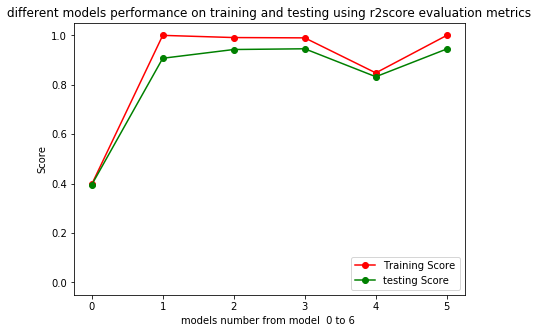

In [70]:
    max_depth = np.arange(6)

plt.figure(figsize=(7, 5))

    plt.title('different models performance on training and testing using r2score evaluation metrics')
    plt.plot(max_depth, training, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, testing, 'o-', color = 'g', label = 'testing Score')
    
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('models number from model  0 to 6 ')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

# conclusion 


**the best regressoin model for this problem is by using random forest regressor (ensemble method)**

**Training score 0.9898624584628091**

**Testing score 0.9456533109871985**
